In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './datalab/'
train_data = pd.read_csv(path + 'used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv(path + 'used_car_testB_20200421.csv',sep=' ')

In [3]:
train_data.head().append(train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
print(train_data.shape)
print(test_data.shape)

(150000, 31)
(50000, 30)


In [5]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [7]:
missing_values = train_data.isnull().sum()
missing_percent = (train_data.isnull().sum()/len(train_data))*100
missing_value_table = pd.concat([missing_values, missing_percent],axis=1)
missing_value_table = missing_value_table.rename(columns={0:'缺失值',1:'缺失率'})
missing_value_table = missing_value_table[missing_value_table.iloc[:1] != 0].sort_values('缺失率',ascending = False)
print(missing_value_table)

                   缺失值  缺失率
SaleID             NaN  NaN
name               NaN  NaN
regDate            NaN  NaN
model              NaN  NaN
brand              NaN  NaN
bodyType           NaN  NaN
fuelType           NaN  NaN
gearbox            NaN  NaN
power              NaN  NaN
kilometer          NaN  NaN
notRepairedDamage  NaN  NaN
regionCode         NaN  NaN
seller             NaN  NaN
offerType          NaN  NaN
creatDate          NaN  NaN
price              NaN  NaN
v_0                NaN  NaN
v_1                NaN  NaN
v_2                NaN  NaN
v_3                NaN  NaN
v_4                NaN  NaN
v_5                NaN  NaN
v_6                NaN  NaN
v_7                NaN  NaN
v_8                NaN  NaN
v_9                NaN  NaN
v_10               NaN  NaN
v_11               NaN  NaN
v_12               NaN  NaN
v_13               NaN  NaN
v_14               NaN  NaN


In [8]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [9]:
train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [10]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [11]:
test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [12]:
test_data['notRepairedDamage'].value_counts()

0.0    37224
1.0     4707
Name: notRepairedDamage, dtype: int64

In [13]:
train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [14]:
train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [15]:
del train_data['seller']
del test_data['seller']
del train_data['offerType']
del test_data['offerType']

In [16]:
print(train_data.shape)
print(test_data.shape)

(150000, 29)
(50000, 28)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

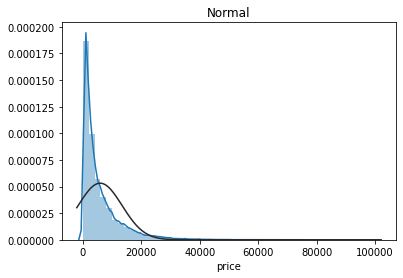

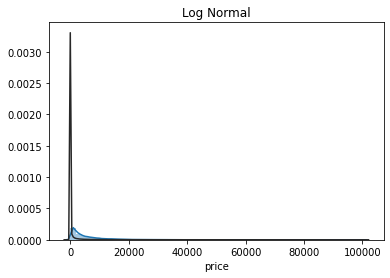

In [17]:
#查看预测变量的分布情况
import scipy.stats as st
%matplotlib inline
y = train_data['price']

plt.figure(1)
plt.title('Normal')
sns.distplot(y,fit=st.norm)

plt.figure(2)
plt.title('Log Normal')
sns.distplot(y,fit=st.lognorm)

((array([-4.43418927, -4.23918495, -4.13325226, ...,  4.13325226,
          4.23918495,  4.43418927]),
  array([   11,    11,    12, ..., 99999, 99999, 99999], dtype=int64)),
 (6206.02382253555, 5923.327333333333, 0.8272271960645551))

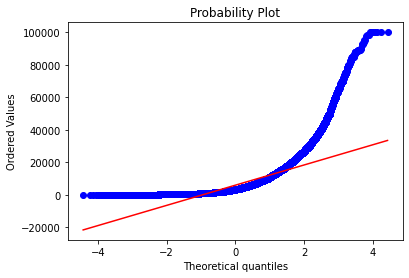

In [18]:
#q-q图()分析不同数据集是否为同一分布，且可以用Q-Q图来验证数据集是否符合正态分布。
st.probplot(y, plot=plt)

In [19]:





#对数变换
y_log = np.log(train_data['price'])

((array([-4.43418927, -4.23918495, -4.13325226, ...,  4.13325226,
          4.23918495,  4.43418927]),
  array([ 2.39789527,  2.39789527,  2.48490665, ..., 11.51291546,
         11.51291546, 11.51291546])),
 (1.2151957430945006, 8.03454046825396, 0.9966572080713786))

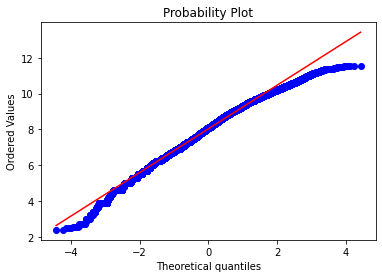

In [20]:
st.probplot(y_log, plot=plt)

In [21]:
#分离预测值
y_train = train_data['price']

In [22]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [23]:

# 特征nunique分布,删除数据倾斜度较高的数据
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, train_data[cat_fea].nunique()))
    print(train_data[cat_fea].value_counts(ascending=False))

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [24]:
numeric_features.append('price')

In [25]:
#相关性分析
corr_matrix = train_data[numeric_features].corr()
print(corr_matrix['price'])

power        0.219834
kilometer   -0.440519
v_0          0.628397
v_1          0.060914
v_2          0.085322
v_3         -0.730946
v_4         -0.147085
v_5          0.164317
v_6          0.068970
v_7         -0.053024
v_8          0.685798
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
v_12         0.692823
v_13        -0.013993
v_14         0.035911
price        1.000000
Name: price, dtype: float64


<AxesSubplot:>

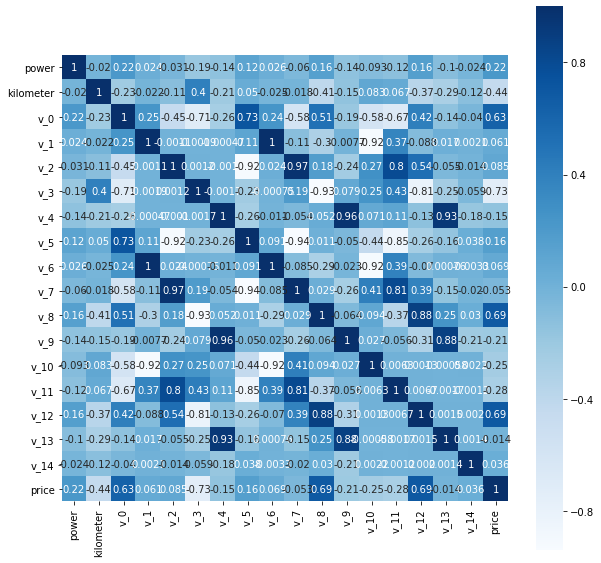

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,square=True,cmap='Blues',annot=True)

In [27]:
numeric_features.remove('price')

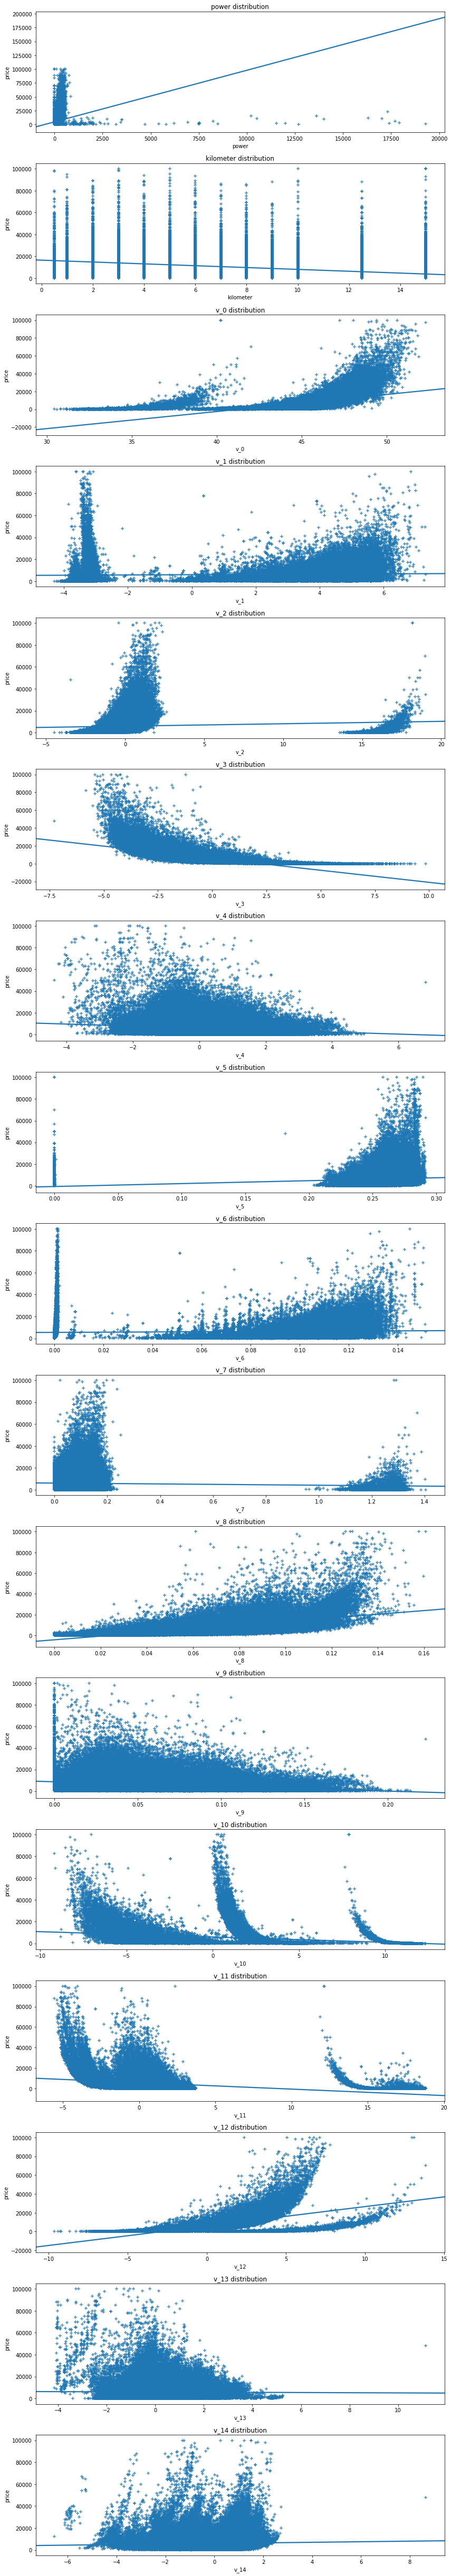

In [28]:
plt.figure(figsize=(12,68))
for i,col in enumerate(numeric_features):
    plt.subplot(17,1,i+1)
    sns.regplot(x=col,y='price',marker="+",ci=None,data=train_data)
    plt.title('%s distribution' % col)

plt.tight_layout()

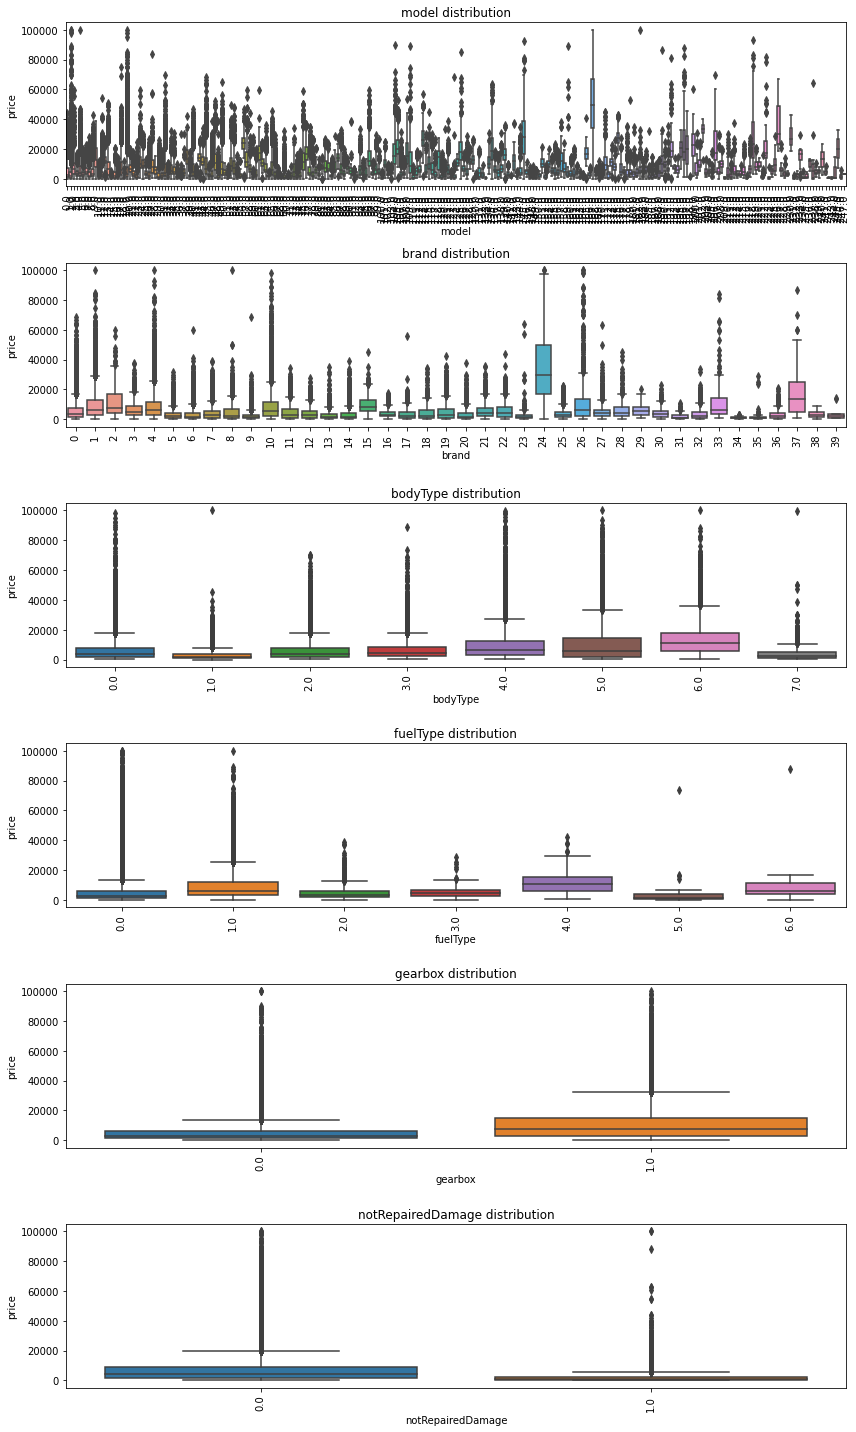

In [29]:
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

plt.figure(figsize=(12,20))
for i,col in enumerate(categorical_features):
    plt.subplot(6,1,i+1)
    sns.boxplot(x=col,y='price',data=train_data)
    plt.title('%s distribution' % col)
    plt.xticks(rotation=90)

plt.tight_layout()#会自动调整子图参数，使之填充整个图像区域。防止标题标签遮挡

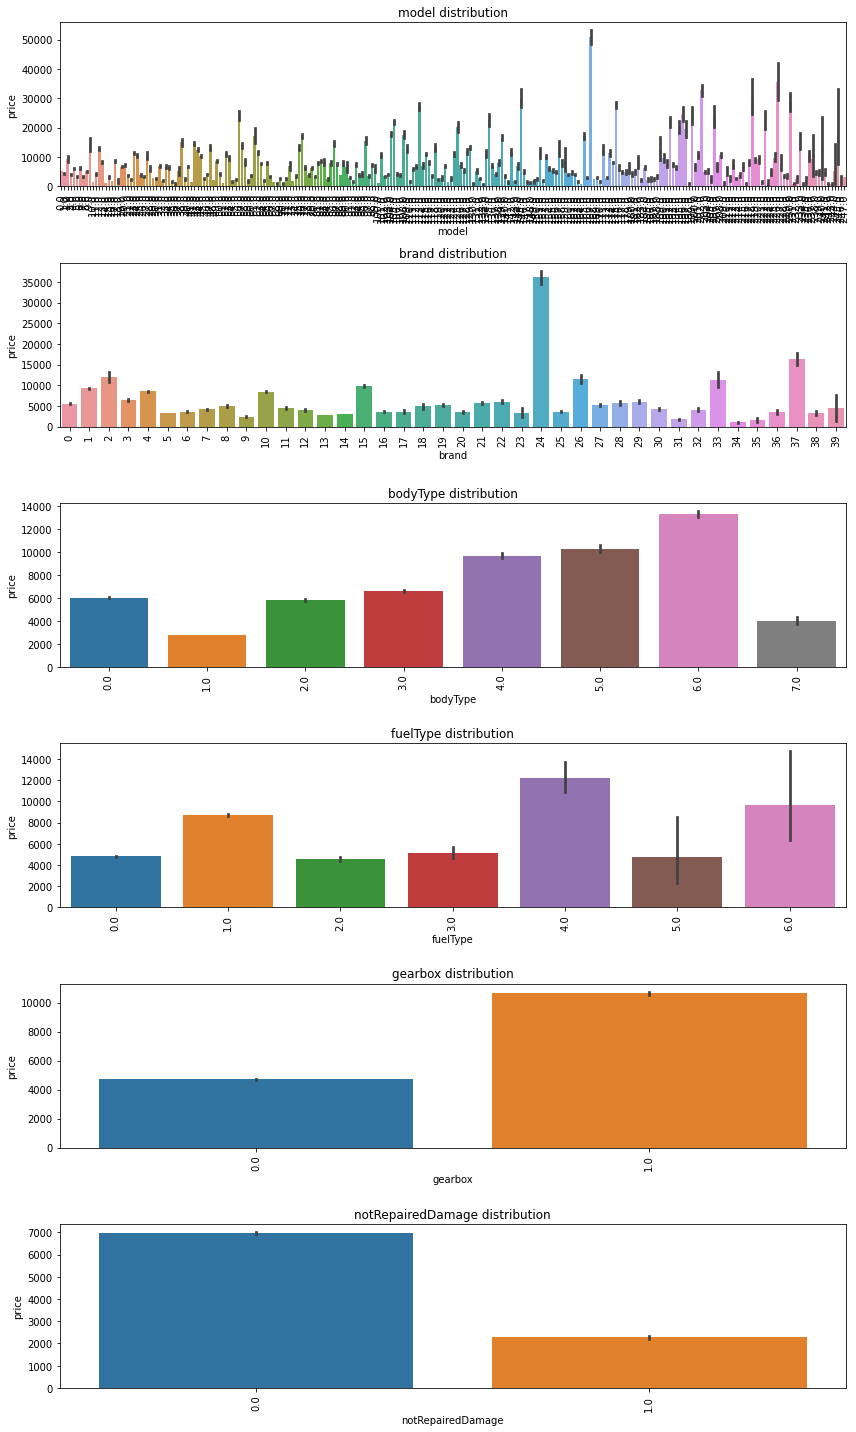

In [30]:
plt.figure(figsize=(12,20))
for i,col in enumerate(categorical_features):
    plt.subplot(6,1,i+1)
    sns.barplot(x=col,y='price',data=train_data)
    plt.title('%s distribution' % col)
    plt.xticks(rotation=90)

plt.tight_layout()

In [31]:
data = pd.concat([train_data,test_data],axis=0,ignore_index=True)

In [32]:
data.shape

(200000, 29)

In [33]:
#汽车使用时间,errors='coerce'错误用nat填充
data['used_time'] = (pd.to_datetime(data['creatDate'],format='%Y%m%d',errors='coerce') - 
                     pd.to_datetime(data['regDate'],format='%Y%m%d',errors='coerce')).dt.days

In [34]:
data['used_time'].fillna(data['used_time'].mean(), inplace = True)

In [35]:
aggregations_brand = {
    'price':['max','min','mean','sum'],
}

aggs_brand = data.groupby('brand').agg(aggregations_brand).reset_index()

#修改列名
new_columns = ['brand']

for var,stat in aggs_brand.columns.values:
    if var != 'brand':
        new_columns.append('%s_%s' % (var,stat))

aggs_brand.columns = new_columns
print(aggs_brand.columns)
#商标和价格关系密切，统计各商标的平均价格等作为新的特征

Index(['brand', 'price_max', 'price_min', 'price_mean', 'price_sum'], dtype='object')


In [36]:
aggs_brand

,brand,price_max,price_min,price_mean,price_sum
0,0,68500.0,13.0,5535.364994,174253290.0
1,1,99900.0,15.0,9273.311947,127916065.0
2,2,59800.0,35.0,12037.822430,3864141.0
3,3,37500.0,65.0,6482.822430,15954226.0
4,4,99999.0,12.0,8538.788074,142913696.0
5,5,31500.0,20.0,3306.349411,15424120.0
6,6,59900.0,13.0,3611.840266,36902172.0
7,7,38900.0,60.0,4196.064803,9906909.0
8,8,99999.0,30.0,4900.515166,10178370.0
9,9,68530.0,50.0,2438.274843,17814036.0


In [37]:
data = data.merge(aggs_brand,on='brand',how='left')

In [38]:
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_10,v_11,v_12,v_13,v_14,used_time,price_max,price_min,price_mean,price_sum
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385.0,59900.0,13.0,3611.840266,36902172.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757.0,99900.0,15.0,9273.311947,127916065.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382.0,45000.0,100.0,9858.582990,14373814.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125.0,98000.0,15.0,8470.804197,120700489.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,-1.896240,0.910783,0.931110,2.834518,1.923482,1531.0,31500.0,20.0,3306.349411,15424120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,2.072901,-2.531869,1.716978,-1.063437,0.326587,4173.0,99999.0,12.0,8538.788074,142913696.0
199996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,1.358504,-3.290295,4.269809,0.140524,0.556221,1079.0,99900.0,15.0,9273.311947,127916065.0
199997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,2.165658,-2.417885,1.370612,-1.073133,0.270602,4113.0,99999.0,12.0,8538.788074,142913696.0
199998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,2.030114,-2.939244,0.569078,-1.718245,0.316379,5017.0,99900.0,15.0,9273.311947,127916065.0


In [39]:
data.shape

(200000, 34)

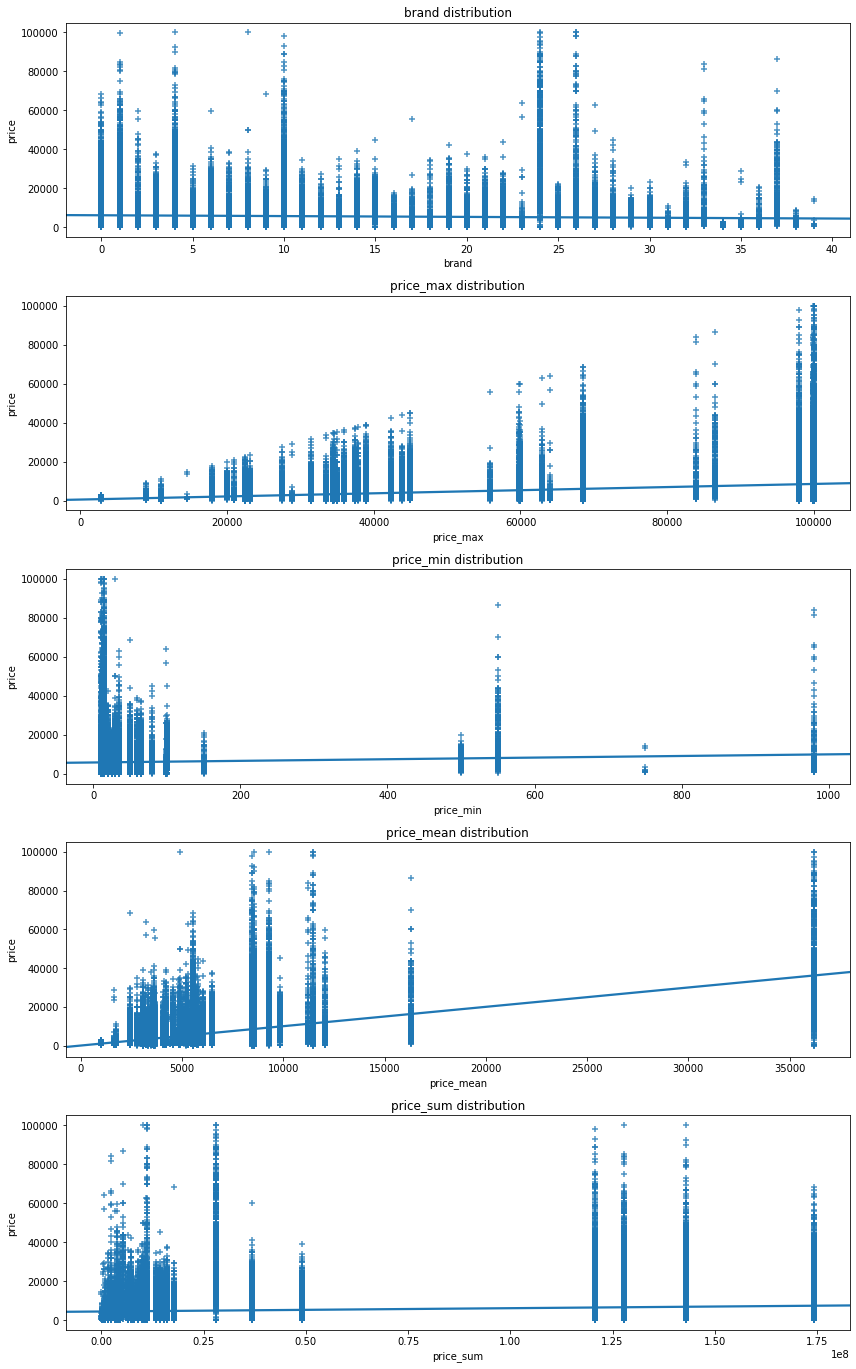

In [40]:
plt.figure(figsize=(12,68))
for i,col in enumerate(new_columns):
    plt.subplot(18,1,i+1)
    sns.regplot(x=col,y='price',marker="+",ci=None,data=data)
    plt.title('%s distribution' % col)

plt.tight_layout()


In [41]:
data.drop(['creatDate','regDate','regionCode'],axis=1,inplace=True)

In [42]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['bodyType', 'fuelType','gearbox', 'notRepairedDamage'])

In [43]:
data.columns

Index(['SaleID', 'name', 'model', 'brand', 'power', 'kilometer', 'price',
       'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'used_time', 'price_max',
       'price_min', 'price_mean', 'price_sum', 'bodyType_0.0', 'bodyType_1.0',
       'bodyType_2.0', 'bodyType_3.0', 'bodyType_4.0', 'bodyType_5.0',
       'bodyType_6.0', 'bodyType_7.0', 'fuelType_0.0', 'fuelType_1.0',
       'fuelType_2.0', 'fuelType_3.0', 'fuelType_4.0', 'fuelType_5.0',
       'fuelType_6.0', 'gearbox_0.0', 'gearbox_1.0', 'notRepairedDamage_0.0',
       'notRepairedDamage_1.0'],
      dtype='object')

In [44]:
minmax_features = ['power','kilometer']
       
#power - 汽车功率 kilometer - 汽车行驶公里 归一化
for col in minmax_features:
    data[col] = ((data[col] - np.min(data[col])) / 
                        (np.max(data[col]) - np.min(data[col])))

In [45]:
correlation = data.corr()
correlation['price'].sort_values()

v_3                     -0.730946
used_time               -0.598434
kilometer               -0.440519
gearbox_0.0             -0.277188
v_11                    -0.275320
v_10                    -0.246175
bodyType_1.0            -0.231627
v_9                     -0.206205
fuelType_0.0            -0.186843
notRepairedDamage_1.0   -0.157523
v_4                     -0.147085
v_7                     -0.053024
brand                   -0.043799
bodyType_7.0            -0.023466
fuelType_2.0            -0.022291
v_13                    -0.013993
bodyType_2.0            -0.006889
fuelType_3.0            -0.004191
fuelType_5.0            -0.002802
SaleID                  -0.001043
name                     0.002030
fuelType_6.0             0.007622
bodyType_0.0             0.008211
fuelType_4.0             0.023362
bodyType_3.0             0.028922
price_min                0.029842
v_14                     0.035911
v_1                      0.060914
v_6                      0.068970
v_2           

In [46]:
#相关性筛选
corrs = data.corr().abs()

threshold = 0.8
#np.triu返回函数的上三角矩阵
upper = corrs.where(np.triu(np.ones(corrs.shape),k=1).astype('bool'))

In [47]:
upper

,SaleID,name,model,brand,power,kilometer,price,v_0,v_1,v_2,...,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0
SaleID,NaN,0.000308,0.003596,0.000407,0.001235,0.000341,0.001043,0.001906,0.002396,0.000332,...,0.000702,0.000311,0.001662,0.001838,0.001876,0.002766,0.001628,0.002813,0.001715,0.002363
name,NaN,NaN,0.016435,0.040027,0.000694,0.008900,0.002030,0.122613,0.637262,0.005628,...,0.017062,0.030193,0.007721,0.003436,0.003452,0.006241,0.024470,0.022950,0.110612,0.009204
model,NaN,NaN,NaN,0.356408,0.029609,0.090760,0.136983,0.089937,0.018179,0.036422,...,0.047420,0.011980,0.018752,0.022743,0.002545,0.008795,0.007651,0.022946,0.052007,0.009319
brand,NaN,NaN,NaN,NaN,0.021740,0.098754,0.043799,0.103207,0.025370,0.034432,...,0.133499,0.043648,0.006292,0.045335,0.011743,0.011258,0.016835,0.010412,0.006140,0.023076
power,NaN,NaN,NaN,NaN,NaN,0.018015,0.219834,0.206193,0.022181,0.030972,...,0.062387,0.023060,0.002557,0.000357,0.000504,0.002315,0.106898,0.154974,0.069410,0.020990
kilometer,NaN,NaN,NaN,NaN,NaN,NaN,0.440519,0.225084,0.021463,0.108302,...,0.095213,0.050317,0.003961,0.029235,0.006051,0.030402,0.045776,0.043656,0.120936,0.086708
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628397,0.060914,0.085322,...,0.249869,0.022291,0.004191,0.023362,0.002802,0.007622,0.277188,0.330353,0.239071,0.157523
v_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.243737,0.452807,...,0.329304,0.007599,0.001868,0.022088,0.009911,0.004385,0.167084,0.302648,0.352309,0.143978
v_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001800,...,0.044307,0.041022,0.009206,0.003837,0.006083,0.007893,0.021388,0.002771,0.176827,0.016245
v_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006955,0.025675,0.002389,0.002122,0.004298,0.004641,0.153143,0.006849,0.136537,0.035399


In [48]:
#列出相关度大于阈值的列，说明它本身与其他的某列特征高度相似，可以考虑删除
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
print(len(to_drop))

11


In [49]:
data.drop(columns=to_drop, axis = 1)

,SaleID,name,model,brand,power,kilometer,price,v_0,v_1,v_2,...,bodyType_7.0,fuelType_0.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,notRepairedDamage_0.0,notRepairedDamage_1.0
0,0,736,30.0,6,0.003107,0.827586,1850.0,43.357796,3.966344,0.050257,...,0,1,0,0,0,0,0,1,1,0
1,1,2262,40.0,1,0.000000,1.000000,3600.0,45.305273,5.236112,0.137925,...,0,1,0,0,0,0,0,1,0,0
2,2,14874,115.0,15,0.008440,0.827586,6222.0,45.978359,4.823792,1.319524,...,0,1,0,0,0,0,0,1,1,0
3,3,71865,109.0,10,0.009994,1.000000,2400.0,45.687478,4.492574,-0.050616,...,0,1,0,0,0,0,0,0,1,0
4,4,111080,110.0,5,0.003521,0.310345,5200.0,44.383511,2.031433,0.572169,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,249995,111443,4.0,4,0.007767,1.000000,NaN,46.321013,-3.304401,0.073363,...,0,0,0,0,0,0,0,0,0,0
199996,249996,152834,65.0,1,0.009269,0.241379,NaN,48.086547,-3.318641,0.965881,...,0,1,0,0,0,0,0,1,1,0
199997,249997,132531,4.0,4,0.007612,0.827586,NaN,46.145279,-3.305263,-0.015283,...,0,1,0,0,0,0,0,0,1,0
199998,249998,143405,40.0,1,0.009114,1.000000,NaN,45.507088,-3.197006,-1.141252,...,0,1,0,0,0,0,0,0,1,0


In [50]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [51]:
reduce_mem_usage(data)

Memory usage of dataframe is 48600000.00 MB
Memory usage after optimization is: 21800000.00 MB
Decreased by 55.1%


,SaleID,name,model,brand,power,kilometer,price,v_0,v_1,v_2,...,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0
0,0,736,30.0,6,0.003107,0.827637,1850.0,43.34375,3.966797,0.050262,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,2262,40.0,1,0.000000,1.000000,3600.0,45.31250,5.234375,0.137939,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,14874,115.0,15,0.008438,0.827637,6222.0,45.96875,4.824219,1.319336,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,71865,109.0,10,0.009995,1.000000,2400.0,45.68750,4.492188,-0.050629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,111080,110.0,5,0.003521,0.310303,5200.0,44.37500,2.031250,0.572266,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,249995,111443,4.0,4,0.007767,1.000000,NaN,46.31250,-3.304688,0.073364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199996,249996,152834,65.0,1,0.009270,0.241333,NaN,48.09375,-3.318359,0.965820,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
199997,249997,132531,4.0,4,0.007610,0.827637,NaN,46.15625,-3.304688,-0.015282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
199998,249998,143405,40.0,1,0.009117,1.000000,NaN,45.50000,-3.197266,-1.141602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [52]:
test = data[150000:].copy()
test.drop(columns='price',axis=1)


,SaleID,name,model,brand,power,kilometer,v_0,v_1,v_2,v_3,...,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0
150000,200000,133777,67.0,0,0.005230,1.000000,42.15625,-3.095703,-0.721191,1.466797,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150001,200001,61206,19.0,6,0.003780,0.379395,43.90625,-3.244141,-0.766602,1.276367,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150002,200002,67829,5.0,5,0.006214,0.310303,45.37500,3.373047,-0.965332,-2.447266,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
150003,200003,8892,22.0,9,0.003004,1.000000,42.78125,4.035156,-0.217407,1.708984,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150004,200004,76998,46.0,6,0.006008,1.000000,43.65625,-3.134766,-1.133789,0.470215,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,249995,111443,4.0,4,0.007767,1.000000,46.31250,-3.304688,0.073364,-0.622559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199996,249996,152834,65.0,1,0.009270,0.241333,48.09375,-3.318359,0.965820,-2.671875,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
199997,249997,132531,4.0,4,0.007610,0.827637,46.15625,-3.304688,-0.015282,-0.288330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
199998,249998,143405,40.0,1,0.009117,1.000000,45.50000,-3.197266,-1.141602,-0.434814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [53]:
train = data[:150000].copy()

In [54]:
train_id = train['SaleID'].copy()

In [55]:
train.drop(columns=['SaleID'],axis=1,inplace=True)

In [56]:
test_id = test['SaleID'].copy()

In [57]:
test.drop(columns=['SaleID'],axis=1,inplace=True)

In [58]:
y_train = train['price'].copy()
features_name = [x for x in train.columns if x not in ['price','brand','model']]
x_train = train[features_name].copy()

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,  make_scorer

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import  LinearRegression

In [61]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          LGBMRegressor(n_estimators = 100)]

In [62]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    #平均绝对误差 MAE
    scores = cross_val_score(model, X=x_train, y=y_train, verbose=0, cv = 5, scoring=make_scorer(mean_squared_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
LGBMRegressor is finished


In [63]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,LGBMRegressor
cv1,1.587397e+07,4.097003e+06,2.030181e+06,2.054470e+06
cv2,1.634172e+07,4.046433e+06,1.838101e+06,1.794572e+06
cv3,1.800458e+07,4.416558e+06,2.118974e+06,2.125031e+06
cv4,1.607574e+07,4.130585e+06,1.878444e+06,1.852166e+06
cv5,1.673941e+07,4.249347e+06,2.104274e+06,1.974963e+06


In [64]:
x_test= test[features_name].copy()

In [65]:
from bayes_opt import BayesianOptimization

In [66]:
def rf_cv(n_estimators,num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            n_estimators=int(n_estimators),
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=x_train, y=y_train, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val
#https://zhuanlan.zhihu.com/p/131216861

In [67]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'n_estimators':(10,500),
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)

In [68]:
rf_bo.maximize()

|   iter    |  target   | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
|  1        | -648.5    |  92.6     |  49.76    |  338.5    |  16.62    |  0.2048   |
|  2        | -647.3    |  5.259    |  50.42    |  292.8    |  25.56    |  0.5232   |
|  3        | -857.9    |  23.63    |  46.93    |  53.45    |  23.85    |  0.243    |
|  4        | -560.7    |  60.56    |  74.88    |  369.8    |  71.11    |  0.2122   |
|  5        | -562.0    |  72.83    |  86.34    |  377.6    |  68.53    |  0.6804   |
|  6        | -561.8    |  75.17    |  84.49    |  382.2    |  66.55    |  0.6192   |
|  7        | -799.7    |  2.0      |  100.0    |  500.0    |  100.0    |  1.0      |
|  8        | -552.3    |  100.0    |  2.0      |  389.3    |  100.0    |  1.0      |
|  9        | -1.071e+0 |  100.0    |  2.0      |  500.0    |  2.0      |  0.1      |
|  10       | -563.7    |  100.0    |  2.0      |  255

In [69]:
rf_bo.max

{'target': -542.0196078967851,
 'params': {'max_depth': 88.02253525176796,
  'min_child_samples': 25.800235460721147,
  'n_estimators': 498.0050877432476,
  'num_leaves': 99.61113959916774,
  'subsample': 0.21776528815615587}}

In [70]:
model_bayes = LGBMRegressor(n_estimators=498,
                                   max_depth=88,
                                   min_child_samples=26,
                                   num_leaves=99,
                                   subsample=0.21)

In [71]:
scores = cross_val_score(model_bayes, X=x_train, y=y_train, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))

In [72]:
print('avg',np.mean(scores))

avg 556.7909079271434


In [73]:
model_lgb_bayes = model_bayes.fit(x_train,y_train)

In [74]:
sub_lgb_bayes = model_lgb_bayes.predict(x_test)

#### 可以不同模型进行加权融合,score_A/B分别为不同的模型交叉验证得分，sub_lgb_bayes/subB_xgb_bayes为分别预测值然后按下面公式加权。
sub_Weighted = (1-score_A/(score_A+score_B))*sub_lgb_bayes+(1-score_B/(score_A+score_B))*subB_xgb_bayes

In [100]:
sub_bayes = pd.DataFrame()
sub_bayes['SaleID'] = test_id
sub_bayes['price'] = sub_lgb_bayes
sub_bayes.to_csv('./datalab/sub_lgb_bayes.csv',index=False)